# Lab 3 - Pytorch

## Table of content

[1. Pytorch basics](#basics)<br>
- [1.1 Pytorch tutorials](#tutorials)<br>
- [1.2 Neural Network in Pytorch](#NNPytorch)<br>


[2. Simple Example for handling images](#SimpleExampleImage)<br>
- [2.1  Loading MNIST dataset ](#LoadMNIST)<br>
- [2.2  Normalization  ](#Normalization)<br>
- [2.3  Train a Neural Network in Pytorch ](#TrainNNPytorch)<br>
- [2.4  Train more classical ML algorithms](#ML)<br>

[Bonus 1. Backpropagation](#B1)<br>

[Bonus 2. NN Playground](#B2)<br>








**Import the following libraries and check that Pytorch is running on your computer.**

In [1]:
#pip install numpy pandas matplotlib torch torchvision


In [2]:
#pip install --upgrade torch torchvision


In [3]:
#pip install torch torchvision

In [4]:
#pip install torchsummary 

In [5]:
from __future__ import print_function
from __future__ import division

import os
import time

import numpy as np
import pandas
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [6]:

print('\n\n(If this cell runs for more than 30 seconds, stop it and rerun it.) \n\n')


import requests
exec(requests.get("https://raw.githubusercontent.com/claireBoyer/tutorial-conformal-prediction/main/labs/aux-npt/get-send-code.html").content)


# Replace 'TO_UPDATE' with the appropriate session information
npt_config = {'session_name': 'Lab3-Map545',}


# Prompt for the sender's name
npt_config['sender_name'] = input("Enter your name: \n -->")
npt_config['session_owner'] = input("\n \n Your teacher: depending on your teacher, enter either \n - ataylor \n - pascalbianchi \n - constantin.philippenko \n - renaud.gaucher \n-->") #  

print('\n \n You should get as an output <Response [200]> below. If not, you probably have a typo in the teacher name, retry :)')

send('started', 0)




(If this cell runs for more than 30 seconds, stop it and rerun it.) 


Enter your name: 
 -->

 
 Your teacher: depending on your teacher, enter either 
 - ataylor 
 - pascalbianchi 
 - constantin.philippenko 
 - renaud.gaucher 
-->

 
 You should get as an output <Response [200]> below. If not, you probably have a typo in the teacher name, retry :)


<Response [400]>

<a id='basics'></a>
# 1 - Pytorch basics



<a id='tutorials'></a>

## 1.1 - Pytorch tutorials

Look at the following two tutorials: 
- How to write tensor operations: 

    https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py
- A list of functions that are available in PyTorch:

    https://pytorch.org/docs/stable/torch.html
- How to define and train a neural network in PyTorch 

    https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
- More information on neural networks with PyTorch can be found here

    https://pytorch.org/docs/stable/nn.html

<a id='NNPytorch'></a>

## 1.2 - Neural Network in Pytorch

Here is an example of a simple neural network architecture in Python

In [9]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        
#self.hidden is a linear layer with 784 input features and 256 output features.
#The number 784 corresponds to the input size, which could represent, a 28x28 image flattened into a single vector

# self.output is another linear layer that takes the 256 features from the hidden layer and outputs 10 features
# which correspond to the class scores for each of the 10 possible digits (0 through 9)


        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
    
    
# forward method defines the data flow through the network:
#Input x is passed through the hidden layer, the Sigmoid function, the output layer, and the Softmax function.
#The result of the forward method is the predicted probabilities for each of the 10 digit classes.


In [10]:
model1=Network()
model1

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

**1) What does the dim  argument in Softmax correspond to?**

The dim argument in the Softmax function specifies the dimension along which the Softmax function is applied.

When dim=1, it means that the Softmax function should calculate probabilities across the columns, not the rows. In other words, for a given mini-batch of data, the function will be applied to the second dimension (where the first dimension is the batch dimension), which is typically where the class scores for each sample are located.
This ensures that each row of outputs (each corresponding to a different sample in the batch) sums to 1, as we want to have a probability distribution over the classes for each sample.


In a neural network for classification, the output is often a 2D tensor where each row corresponds to a sample and each column corresponds to a class score. By setting dim=1, we're telling Softmax to convert these scores into probabilities for each sample independently.

In [11]:
# Consider the following tensor
u = torch.rand(2,3) #2x3 matrix is a random float between 0 and 1.
print("This is a tensor", '\n', u,'\n' )

outputdim1 = F.softmax(u, dim=1)
print("This is the output of the softmax operation with dim=1", '\n', outputdim1,'\n' )

outputdim0 = F.softmax(u, dim=0)
print("This is the output of the operation with dim=0", '\n', outputdim0,'\n' )


# Consider the following tensor
u2 = torch.ones(2,3)
print("This is a tensor", '\n', u2,'\n' )

outputdim1 = F.softmax(u2, dim=1)
print("This is the output of the softmax operation with dim=1", '\n', outputdim1,'\n' )

outputdim0 = F.softmax(u2, dim=0)
print("This is the output of the operation with dim=0", '\n', outputdim0,'\n' )

This is a tensor 
 tensor([[0.9492, 0.3755, 0.2931],
        [0.5107, 0.6712, 0.9131]]) 

This is the output of the softmax operation with dim=1 
 tensor([[0.4802, 0.2706, 0.2492],
        [0.2725, 0.3200, 0.4075]]) 

This is the output of the operation with dim=0 
 tensor([[0.6079, 0.4266, 0.3498],
        [0.3921, 0.5734, 0.6502]]) 

This is a tensor 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

This is the output of the softmax operation with dim=1 
 tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]]) 

This is the output of the operation with dim=0 
 tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]]) 



**Hence: how do you interpret the dim argument?**
    

The dim argument in the softmax function specifies the dimension over which the softmax operation is applied. When using dim=1, the softmax is calculated along the columns, normalizing each row of the input tensor to a probability distribution. With dim=0, it is applied along the rows, normalizing each column of the input tensor. In the context of neural networks, dim=1 is commonly used for a batch of input data, ensuring each output row sums to 1 and represents a probability distribution across classes.


**2) What is the shape of this neural network? What is the shape of the inputs, outputs? What are the activation functions? What is the total number of trainaible parameters?**

In [12]:
# Create the network 
model1 = Network()
model1

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

**Input Shape:** The input shape is not explicitly defined in the Network class, but the first linear layer (self.hidden) suggests that the input tensor should have 784 features.  
**Hidden Layer:** There's one hidden layer with 256 neurons (self.hidden), which uses a Sigmoid activation function (self.sigmoid).    
**Output Shape:** The output layer (self.output) has 10 neurons, one for each class, and uses a Softmax activation function (self.softmax) to produce a probability distribution over the 10 classes.
 
 
You can access a description of the network architecture using  `model1`


**For self.hidden (from input to hidden layer):  
Weights: 784 (input features) * 256 (neurons) = 200,704    
Biases: 256 (one bias per neuron)**      


**For self.output (from hidden layer to output):     
Weights: 256 (neurons in hidden layer) * 10 (output features) = 2,560     
Biases: 10 (one bias per output neuron**     


Total number of trainable parameters = (200,704 + 256) + (2,560 + 10) = 203,530

The number of trainaible parameters is equal to (784 + 1) * 256 + (256 + 1) * 10 = 203,530.


**3) What is the total size (in MB) of this Neural Network ? You may want to use the torchsummary package. Check also that the number of trainable parameters match the one you computed.**

**Total Model Size (in bytes) = Total Number of Parameters * 4  
Total Model Size (in MB) = Total Model Size (in bytes) / (1024 * 1024)**

In [29]:
from torchsummary import summary

# call the "summary" operation with the good arguments

summary(model1, input_size=(784,))

total_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
total_size_bytes = total_params * 4
total_size_mb = total_size_bytes / (1024 * 1024)

print(f"Total number of trainable parameters: {total_params}")
print(f"Total model size: {total_size_mb} MB")


#send('The total estimated size of this neural network is {} [MB]'.format(total_size), 1)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3072 and 784x256)

**4) How can we access the network weigths? the biases? What are their types?**


The shape of the weights in the hidden layer is [256, 784]. This matches the 256 neurons in the hidden layer, each connecting to 784 input features.  

The shape of the biases in the hidden layer is [256], corresponding to one bias term for each of the 256 neurons in the hidden layer.       

The shape of the weights in the output layer is [10, 256]. This corresponds to the 10 output neurons (one for each class), each connecting to the 256 neurons in the hidden layer.
  
The shape of the biases in the output layer is [10], with one bias term for each of the 10 output neurons.

In [14]:
print("The weights of the networks are Torch tensors: ", torch.is_tensor(model1.hidden.weight))
print("The biases of the networks are Torch tensors: ", torch.is_tensor(model1.hidden.bias))


# Weights and biases of the hidden layer
weights_hidden_layer = model1.hidden.weight
bias_hidden_layer = model1.hidden.bias
shape_weights_hidden = weights_hidden_layer.shape
shape_bias_hidden = bias_hidden_layer.shape

# Weights and biases of the output layer
weights_output_layer = model1.output.weight
bias_output_layer = model1.output.bias
shape_weights_output = weights_output_layer.shape
shape_bias_output = bias_output_layer.shape


print("The shape of the weights (hidden layer) is: ", shape_weights_hidden)
print("The shape of the biais (hidden layer) is: ", shape_bias_hidden)
print("The shape of the weights (output layer) is: ", shape_weights_output)
print("The shape of the biais (output layer) is: ", shape_bias_output)

The weights of the networks are Torch tensors:  True
The biases of the networks are Torch tensors:  True
The shape of the weights (hidden layer) is:  torch.Size([256, 784])
The shape of the biais (hidden layer) is:  torch.Size([256])
The shape of the weights (output layer) is:  torch.Size([10, 256])
The shape of the biais (output layer) is:  torch.Size([10])


**5) Another way of creating neural network in Pytorch is by using the module nn.Sequential, see https://pytorch.org/docs/master/nn.html#torch.nn.Sequential**

**Looking at this documentation, create the same neural network as above.**

In [15]:
# Hyperparameters for our network (same as before, using nn.Sequential)
input_size = 784
hidden_sizes = 256
output_size = 10

# Build the same feed-forward network using nn.Sequential : 
model2 = nn.Sequential(
    nn.Linear(input_size, hidden_sizes),
    nn.Sigmoid(),
    nn.Linear(hidden_sizes, output_size),
    nn.Softmax(dim=1)
)

print(model2)

# Sending the array of hyperparameters
hyperparameters = np.array([input_size, hidden_sizes, output_size], dtype=object)
print(hyperparameters)


#send(np.array([input_size,hidden_sizes, output_size], dtype=object), 2)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=10, bias=True)
  (3): Softmax(dim=1)
)
[784 256 10]


**6) Which approach do you recommend: the Sequential one or the one built on the Network class ?**



Sequential: Ideal for simpler, linear stacks of layers where each layer has a single input and output. It's more readable and concise for straightforward architectures.
Choose nn.Sequential for simplicity and when building straightforward, linear models.

Opt for a custom class inheriting from nn.Module when you need more control, customization, or are dealing with complex architectures. Better when your network has a complex flow of data, multiple inputs/outputs per layer, or layers that share weights. It offers more control and customization.




**7) When and how are the weights initialized? You may look into 
https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py#L44-L48**




In PyTorch, the weights of layers such as nn.Linear are initialized automatically when an instance of the layer is created. This default initialization depends on the type of layer and is designed to facilitate the convergence of the training process.

 

The initialization is not explicit in the code above. However, when you run the function

`print(model1.hidden.weight)`

in the previous cells, you notice that values have been assigned to weights. Indeed, when you create a network, weights and biases are automatically initialized. You can see that the initialization which is used is a uniform distribution $U[-1/\text{nb_neurons}, 1/\text{nb_neurons}]$, where nb_neurons is the number of neurons in the layer before the given weight. 


<a id='SimpleExampleImage'></a>

# 2 - Simple Example for handling images

For now, we did not train a neural network, i.e. we did not use a data set to learn the parameters of the network. In fact, we did not work with data. Let us change that. We are going to work with the famous MNIST data set. 

<a id='LoadMNIST'></a>
## 2.1 - Loading the dataset 

TorchVision (https://pytorch.org/docs/stable/torchvision/index.html) package contains a lot of dataset which are easily accessible via 

In [16]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)

You can find additionnal information on functions inherited from the torchvision.datasets class here : 

https://pytorch.org/vision/stable/index.html

**8) Using the function $\texttt{imshow}$ from $\texttt{matplotlib.pyplot}$, plot some images of the dataset MNIST. What is the shape of a MNIST image?**

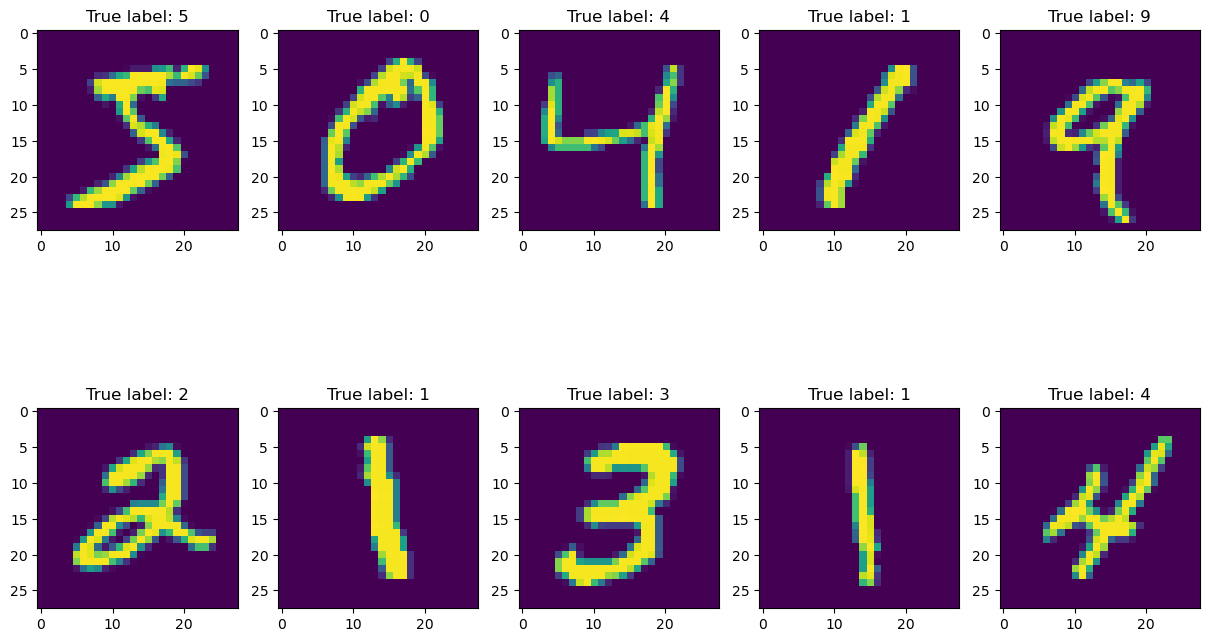

MNIST images are of shapes (28, 28) which leads to 784 dimensions (pixels)


In [17]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#Load the image number i and print its true label



plt.figure(figsize=(15, 9))
for i in range(10):
    plt.subplot(2, 5, i + 1)  #The figure is divided into a grid with 2 rows and 5 columns, 
    #and each image is placed in one part of this grid (i + 1 is the position index in the grid).
    
    # Load the image and its label
    image, label = trainset[i]

    # Plot the image directly as it's a PIL image
    plt.imshow(image)
    plt.title(f"True label: {label}")

plt.show()

# Shape and size of an MNIST image
im_shape = trainset[0][0].size
total_pixels = im_shape[0] * im_shape[1]

print(f"MNIST images are of shapes {im_shape} which leads to {total_pixels} dimensions (pixels)")


<a id='Normalization'></a>
## 2.2 - Normalization 

Data set should be **normalized** to avoid numerical instability.
Indeed, working with big floats can lead to important numerical errors. 
It is a good practice to normalize the inputs (features) so that they have zero mean and a constant (small) variance. To convince yourself of the damages that can result from numerical instability, see the following cell:

In [18]:
foo = 1e9
for i in range(int(1e6)):
    foo += 1e-6
foo -= 1e9
print("Numerically instable sum: %f " % foo)

bar = 1
for i in range(int(1e6)):
    bar += 1e-6
bar -= 1
print("Numerically stable sum: %f " % bar)

Numerically instable sum: 0.953674 
Numerically stable sum: 1.000000 


**9) What conclusion can you draw from the above code?**

a) mathematically speaking, what should be the values of 'foo' and 'bar'?

Mathematically, both foo and bar should be 1. This is because adding 1e-6 a million times sums up to 1. So, essentially, we are adding 1 and then subtracting 1 in both cases.



b) What do you conclude?


The first sum (foo) shows a result of 0.953674, which is significantly different from the expected 1. This deviation is due to the loss of precision in floating-point arithmetic. When adding a very small number (1e-6) to a very large number (1e9), the small number does not significantly affect the sum due to the limited precision with which floating-point numbers are stored.
The second sum (bar) correctly shows 1.000000, which matches the mathematical expectation. Since bar starts with a value of 1, adding 1e-6 does not cause significant precision loss.


Conclusion:

**The code demonstrates the effects of numerical instability in floating-point arithmetic. When dealing with numbers of vastly different magnitudes, precision can be lost, leading to inaccurate results.
It's important in numerical computations, especially in scientific and engineering applications, to be aware of and account for the limitations of floating-point arithmetic. Techniques such as scaling values to similar magnitudes or using higher-precision data types can help mitigate these issues.**





Now, we need to load the dataset and renormalize the data. Additionnally, PyTorch works with tensors, as you have seen in the tutorial. Thus, we need to transform the data into tensors. The following code does this operation.  

In [21]:
from torchvision import transforms

# Define a transform to normalize the data: 
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean = 0.1307, std = 0.3081) ])

# Download (it should have been done earlier, normally) and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
#used to create an iterable over the dataset for easy batch processing.
testloader = torch.utils.data.DataLoader(testset, batch_size = 10000)

# Pour le test on peut avoir un batch size qui est grand car on fait que un forward
#the entire test dataset is loaded in a single batch. 
#This is possible during testing as it involves only forward passes through the network 
#and is less memory intensive compared to training.


#The primary goal of the testing phase is to evaluate the performance of a model that has already been trained.
#This means that we're only interested in seeing how well the model predicts or classifies new, unseen data. 
#Therefore, we only need to pass the data through the model (a forward pass) to obtain predictions.




#In PyTorch, when you iterate over a DataLoader object, it returns batches of data,that consists of two elements:

#Data (Images): The first element of the batch contains the actual data 
#Labels: The second element of the batch contains the labels corresponding to each image in the batch.

**10) Describe the normalization we have implemented. More information on preprocessing data can be found here https://pytorch.org/vision/stable/transforms.html** **What is the training batch size? What is the testing batch size? How many iterations does one epoch contain?**

The normalization step in the code is performed using transforms.Normalize(mean=0.1307, std=0.3081). This is a common preprocessing step in many machine learning workflows, especially for image data.

**Normalization Process:** By appliying the function ToTensor, we transorm an array or image to a tensor. By doing so it normalize the data so that each element is in [0,1]

Mean and Standard Deviation: The values 0.1307 and 0.3081 are specific to the MNIST dataset. These values are the global mean and standard deviation of the MNIST training dataset. 


After that the function Normalize subtracts to each pixel the "mean" parameter 0.1307 (computed on the whole training set, usually per channel) and divides it by "std" (computed in a similar way).
The process involves modifying the values of the input data (images in this case) to have a specific mean and standard deviation. This is done by subtracting the mean from each pixel and then dividing by the standard deviation.

        
**Purpose:** Normalization helps in speeding up the training by ensuring that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network because it helps to standardize the range of the input data. **Data set should be normalized to avoid numerical instability**


**Batch Sizes:**
Training Batch Size: The training batch size is set to 64. This means that in each iteration of the training process, 64 images are processed together. Batch size is a crucial hyperparameter in training neural networks. It defines the number of samples that will be propagated through the network before updating the model parameters.
Testing Batch Size: The testing batch size is set to 10,000. This is unusually large for a batch size, but it's feasible here because during testing, we are only doing a forward pass without backpropagation, which is less memory-intensive. The whole test set can be processed in one go if memory allows.


**Iterations per Epoch:** The number of iterations in one epoch is determined by the total number of training samples divided by the training batch size.
Since MNIST training set has 60,000 images and the batch size is 64, the number of iterations per epoch will be 
60000/64 ≈ 938 iterations (assuming the division is not a whole number, the final batch may be smaller than 64).

The MNIST data set is now loaded and ready to be used to train a neural network.

<a id='TrainNNPytorch'></a>
## 2.3 - Train a Neural Network in Pytorch

**11) Create a neural network of your choice by creating the ReluNetwork class below by filling in the code below. Store the model into an object $\texttt{model}$. You will also have to define a loss, that you can store in an object called $\texttt{criterion}$ and an optimizer, stored in an object called $\texttt{optimizer}$.**

If you are looking for a function in nn, it is probably here: 

https://pytorch.org/docs/stable/nn

If you are looking for an optimizer, the answer may be there:

https://pytorch.org/docs/stable/optim.html

**Describe your choice here:**

My choice: 
- Takes a MNIST image as input
- Linear layer with 128 neurons
- Relu activation function
- Linear layer with 64 neurons
- Relu activation function
- Linear layer with 10 neurons
- LogSoftmax output with Negative Log Likelihood Loss (see the documentation here https://pytorch.org/docs/stable/nn.html#nllloss)




In [22]:
# Goal: Define the network architecture as a new nn.Module subclass
# Compared to the sequential way of defining your network,

class ReluNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        ################## TODO BLOCK
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        ################## END TODO BLOCK
        
        # Output layer, 10 units - one for each digit
        ################## TODO BLOCK
        self.output = nn.Linear(64, 10)
        ################## END TODO BLOCK
        
        # Define Relu activation and softmax output 
        ################## TODO BLOCK
        self.activation1 = nn.ReLU()
        self.activation2 = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        ################## END TODO BLOCK

        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        ################## TODO BLOCK
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.output(x)
        x = self.logsoftmax(x)
        # You can also use Softmax in the last line but in that case, use the CrossEntropyLoss as criterion below
        ################## END TODO BLOCK       
        return x

# Instantiate the model
################## TODO BLOCK
model = ReluNetwork()
################## END TODO BLOCK


# Define the loss
################## TODO BLOCK
criterion = nn.NLLLoss()

# nn.NLLLoss() stands for Negative Log Likelihood Loss.
# It is used in classification problems where the output is a probability distrib(from 0 to 1) across all classes.
# NLLLoss calculates the loss as the negative log probability of the true class. 

#Usage with LogSoftmax:
#Here, the final layer is a LogSoftmax, which converts the output to log probabilities.
#This is why NLLLoss is appropriate here. If you had used a regular Softmax, 
#you would typically use CrossEntropyLoss instead, which combines LogSoftmax and NLLLoss in one step.



optimizer = optim.SGD(model.parameters(), lr=0.01)
#An optimizer is an algorithm or method used to change the attributes of the neural network,to reduce the losses.
#Optimizers are used to minimize (or maximize) a function, which in neural networks is usually the loss function.
#optim.SGD: This stands for Stochastic Gradient Descent. 
#SGD updates the model parameters (weights) in the opposite direction of the gradient of the loss function 



In [23]:
summary(model, input_size=(784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 10]             650
        LogSoftmax-6                   [-1, 10]               0
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------------------


#### Explanations on autodiff

```torch.Tensor``` is the central class of the package. If you set its attribute ```.requires_grad``` as True, it starts to track all operations on it. When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ```.grad``` attribute.

**12) Train the network you have created during a small number of epochs (typically 5). Compute the training loss, training accuracy, test loss, test accuracy for each epoch.
To define a training, we need a model, a criterion (or loss), and an optimizer.
In the following, in order to modify the latest easily in several experiment, we will redefine it automatically inside the training procedure.**

In [46]:
# GOAL: train the network with your optimizer over 5 epochs and  returns the training loss,
# the test loss, and the criterion at the end of each epoch 

start_time = time.time()
epochs = 5


for e in range(epochs):
    running_loss = 0
    running_test_loss=0
    
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad() # What is this line for?
        #clears old gradients from the last step (otherwise gradients would be accumulated).
        
        output = model(images) #TODO OPERAND
        loss = criterion(output, labels) #TODO OPERAND
        #computes the loss between the predictions and the actual labels.
        
        # now: backpropagate and perform one optimization step
        ################## TODO BLOCK
        loss.backward() # Computes the gradients of the loss with respect to the model parameters.
        optimizer.step() # Perform an iteration of the optimization algorithm (SGD here) step.
        # updates the model parameters based on the gradients.
        ################## END TODO BLOCK

        
        running_loss += loss.item()   
        #Accumulates the loss for each batch to calculate the average training loss for the epoch.
    
    #Compute validation loss
    with torch.no_grad():
        for images, labels in testloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
                
            # Complete those lines:
            outputs = model(images) #TODO OPERAND
            test_loss = criterion(outputs, labels) #TODO OPERAND
            running_test_loss += test_loss.item() #TODO OPERAND

            predictions = torch.argmax(outputs, 1) #TODO OPERAND
            # gets the model's predicted class for each image.
            correct_test = predictions.eq(labels).sum().item() #TODO OPERAND
            # counts the number of correct predictions.
               
            test_accuracy = 100 * correct_test / len(predictions) #TODO OPERAND
            #calculates the percentage of correct predictions.
            
        print("Epoch number", e+1)
        print("Training loss: ", round(running_loss/len(trainloader),3))
        print("Test loss: ", round(running_test_loss/len(testloader),3))
        print("Test Accuracy: ", test_accuracy)

print("--- %s seconds ---" % round((time.time() - start_time), 3))

Epoch number 1
Training loss:  0.171
Test loss:  0.158
Test Accuracy:  95.34
Epoch number 2
Training loss:  0.152
Test loss:  0.147
Test Accuracy:  95.77
Epoch number 3
Training loss:  0.136
Test loss:  0.133
Test Accuracy:  95.92
Epoch number 4
Training loss:  0.124
Test loss:  0.122
Test Accuracy:  96.45
Epoch number 5
Training loss:  0.112
Test loss:  0.115
Test Accuracy:  96.52
--- 15.768 seconds ---


**13) More generally, define a training *function* that returns three lists containing respectively the training loss, the test loss, and the criterion value at the end of each epoch.**

In [25]:
##############
# Goal: Define a training **function** that returns the training loss,
# the test loss, and the criterion at the end of each epoch 

def training(model,
             criterion=nn.NLLLoss(),
             optim_alg="SGD",
             lr=0.01,
             momentum=(.9, .999),
             schedule=False,
             nb_epochs=5,
             intermediate_prints=False,
            ):

    if optim_alg == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum[0])
    elif optim_alg == "ADAM":
        optimizer = optim.Adam(model.parameters(), lr=lr, betas=momentum)
    else:
        raise ValueError("optim_alg must take its value in {}".format(["SGD", "ADAM"]))
        
    if schedule:
        scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=1)
    
    epoch_train_losses_list = []
    epoch_test_losses_list = []
    epoch_accuracy_list = []

    for e in range(nb_epochs):
        running_loss = 0
        running_test_loss=0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector

            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            # Evaluate the output, loss, backpropagate and perform an optimization step:
            ################## TODO BLOCK
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            ################## END TODO BLOCK
            

            running_loss += loss.item()


         #Compute validation loss
        with torch.no_grad():
            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)

                # Update the validation loss and compute accuracy:
                outputs = model(images) # TODO OPERAND
                test_loss = criterion(outputs, labels) # TODO OPERAND
                running_test_loss += test_loss.item() # TODO OPERAND
                
                # Calculate predictions, correct counts, and accuracy
                predictions = torch.argmax(outputs, dim=1)
#computes the index with the highest probability in each output. 
#dim=1 specifies that the argmax should be calculated along the dimension representing the class scores for each image.
                correct_test = predictions.eq(labels).sum().item()
#compares the predicted labels with the actual labels, resulting in a tensor of True/False values.
#Summing this tensor (sum()) gives the total number of correct predictions. 
#.item() converts it from a tensor to a Python number.    
                test_accuracy = 100 * correct_test / len(labels)


        final_train_loss = running_loss/len(trainloader)
        final_test_loss = running_test_loss/len(testloader)
        
        if intermediate_prints:
            print("Epoch number: {}".format(e+1))
            print("Training loss = {} ".format(round(final_train_loss,3)))
            print("Test loss = {} ".format(round(final_test_loss,3)))
            print("Test Accuracy = {} ".format(test_accuracy))
        
        epoch_train_losses_list.append(final_train_loss)
        epoch_test_losses_list.append(final_test_loss)
        epoch_accuracy_list.append(test_accuracy)
        
        if schedule:
            scheduler.step(final_test_loss)
        
    return epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list
    
###############

You should now be able to run the cell below, in order to train the neural network with a different optimizer.

In [26]:
# Goal: run a training with the optimization algorithm of your choice

start_time = time.time()
nb_epochs = 5
# Training of the model
epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list = training(
    model,
    criterion=nn.NLLLoss(),
    optim_alg="SGD",
    lr=0.01,
    momentum=(0., ),
    schedule=False,
    nb_epochs=nb_epochs,
    intermediate_prints=True,
)


print("--- %s seconds ---" % round((time.time() - start_time), 3))

Epoch number: 1
Training loss = 0.81 
Test loss = 0.35 
Test Accuracy = 89.82 
Epoch number: 2
Training loss = 0.319 
Test loss = 0.275 
Test Accuracy = 92.0 
Epoch number: 3
Training loss = 0.264 
Test loss = 0.236 
Test Accuracy = 93.14 
Epoch number: 4
Training loss = 0.228 
Test loss = 0.208 
Test Accuracy = 94.11 
Epoch number: 5
Training loss = 0.199 
Test loss = 0.182 
Test Accuracy = 94.66 
--- 15.993 seconds ---


Let's visualize the predictions of the model for some random test images: for a minibatch of size 10 of test images, the following code prints the image, its label, the corresponding prediction given by the network, and the network accuracy on the minibatch. 

**14) Can you find incorrect predictions? Can you make sense of them and/or interpret the output?**

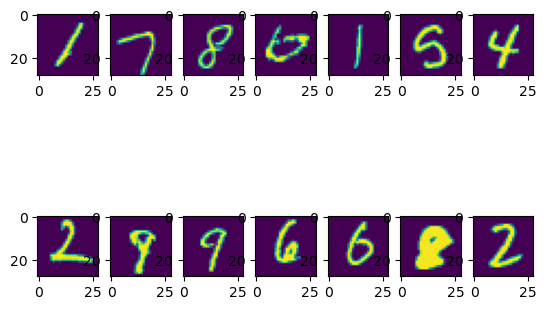

Predictions are tensor([1, 7, 8, 0, 1, 5, 4, 2, 9, 9, 6, 6, 8, 2])
True labels are tensor([1, 7, 8, 6, 1, 5, 4, 2, 9, 9, 6, 6, 8, 2])
test accuracy on this minibatch of size 14 is 93 % 


In [62]:
test_batch_size = 14
minitestloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)
running_loss = 0
running_test_loss = 0
u = 0

for images, labels in minitestloader:
    if u < 1:

        for i in range(test_batch_size):
            plt.subplot(2, int(test_batch_size / 2), i + 1)
            plt.imshow(images[i][0])
        plt.show()

        images = images.view(images.shape[0], -1)
        outputs = model(images)
        test_loss = criterion(outputs, labels)
        running_test_loss += test_loss.item()

        predictions = torch.argmax(outputs, 1)
        print('Predictions are', predictions)
        print('True labels are', labels)
        correct_test = predictions.eq(labels).sum().item()

        print('test accuracy on this minibatch of size %d is %.0f %% ' %
              (test_batch_size, 100 * correct_test / test_batch_size))
        
        test_accuracy = 100 * correct_test / len(predictions)
        u = u + 1

You can change the upper bound on u to display more images. Some incorrect predictions are intriguing because the corresponding images are not close by aspect to the predicted number. The network is not able to use the full information of the picture to make a prediction.

## Analyzing the performance of the optimizer for the training

The cell below plots the training and test error as a function of the number of epochs. 

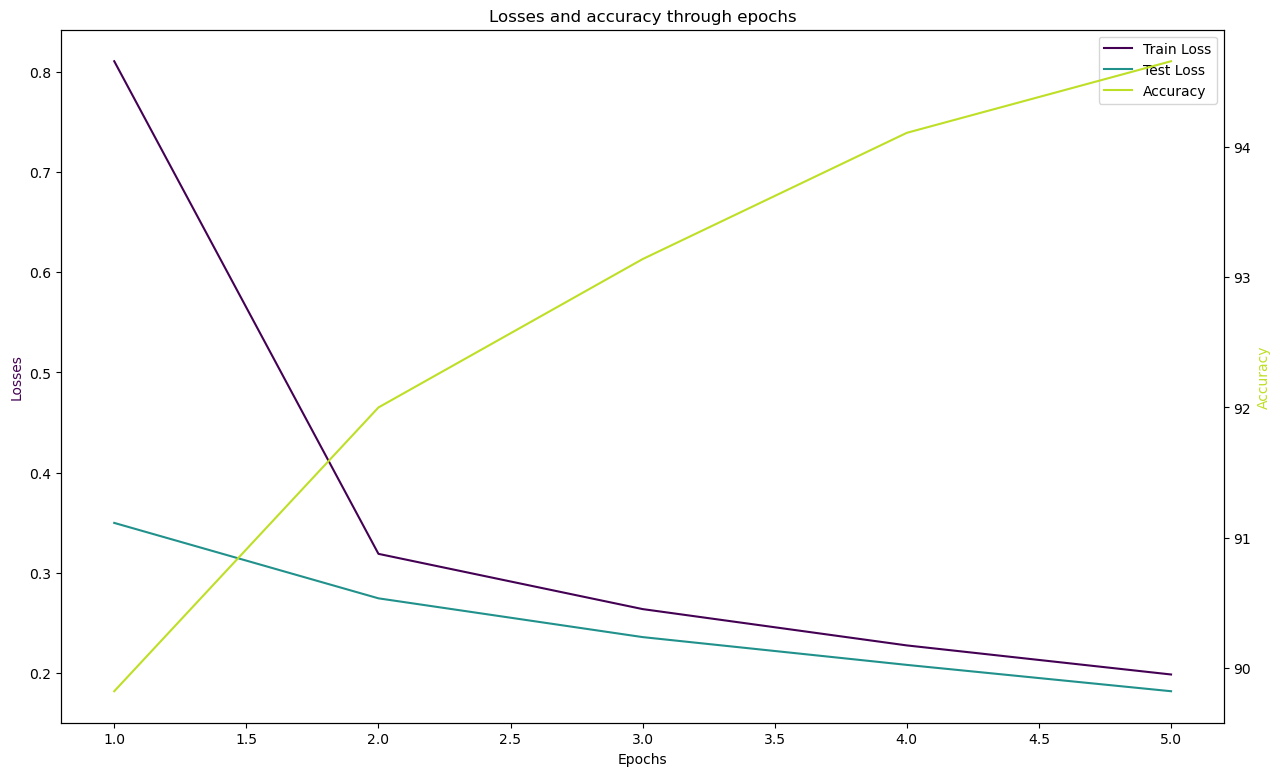

In [27]:
# Plot losses and accuracy curves of the first training through time

fig = plt.figure(figsize=(15, 9))
host = fig.add_subplot(111)
secondary = host.twinx()

host.set_xlabel("Epochs")
host.set_ylabel("Losses")
secondary.set_ylabel("Accuracy")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(np.arange(nb_epochs)+1, epoch_train_losses_list, color=color1, label="Train Loss")
p2, = host.plot(np.arange(nb_epochs)+1, epoch_test_losses_list, color=color2, label="Test Loss")
p3, = secondary.plot(np.arange(nb_epochs)+1, epoch_accuracy_list, color=color3, label="Accuracy")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
secondary.yaxis.label.set_color(p3.get_color())

plt.title("Losses and accuracy through epochs")


plt.show()

As expected, we see a training error which decreases with the number of epochs.  **However, there is no overfitting since the test loss is also decreasing.** We could add a few more epochs to the training procedure to see if the network performance can be improved. The code below compares several optimizers. 

**Train Loss (Purple Line):** This line represents the training loss, which generally decreases as the number of epochs increases. This indicates that the model is learning from the training data, as it should be.

**Test Loss (Green Line):** This line represents the test loss. In the ideal scenario, this should also decrease as the model becomes better at generalizing to unseen data. In the provided graph, the test loss decreases along with the training loss, which is a good sign and suggests that the model is not overfitting to the training data.

**Accuracy (Yellow Line):** The accuracy line shows the percentage of correct predictions made by the model on the test set. Higher accuracy is generally better, and in this graph, it appears to increase over time, suggesting that the model's predictions are becoming more accurate as training progresses.
Important Observations:

The test loss and training loss are decreasing together, which suggests that the model is generalizing well and not just memorizing the training data (overfitting).
The accuracy is increasing, indicating an improvement in the model's predictive performance on the test data.

**15) Based on the code below, which optimizer is the best on this task?**

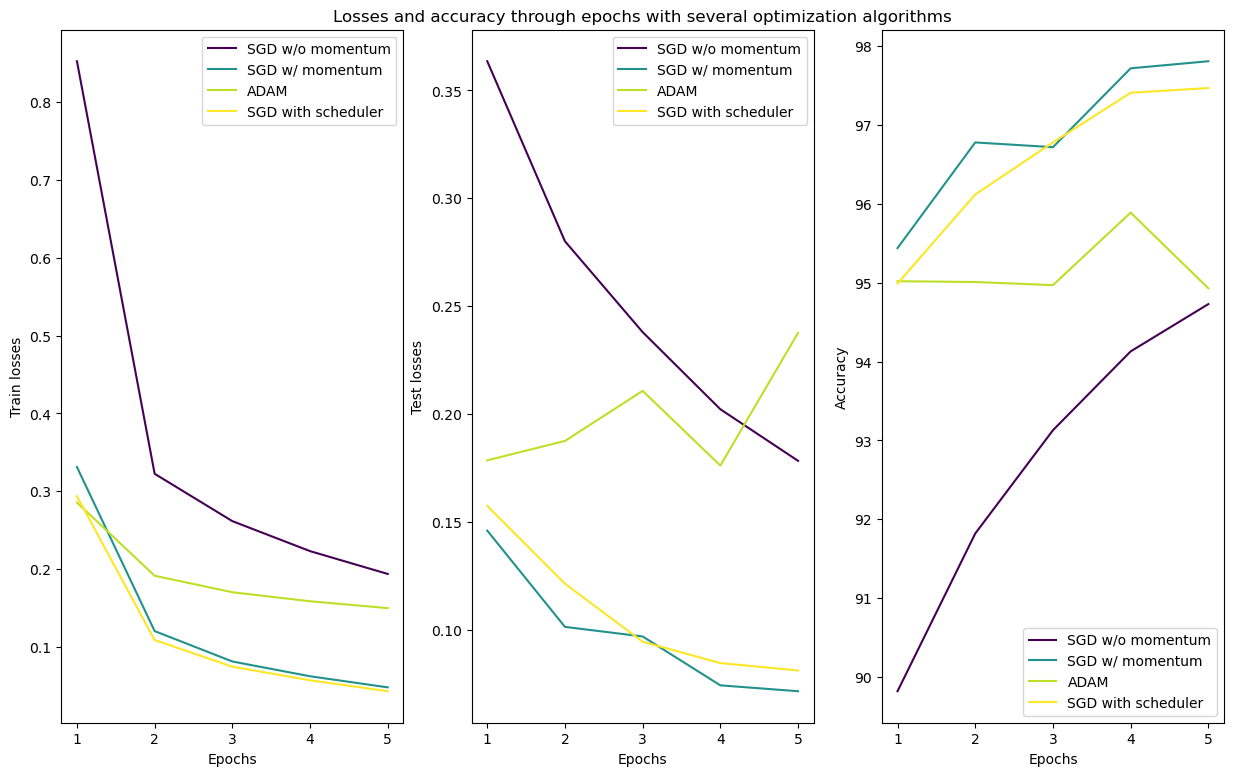

--- 65.495 seconds ---


In [66]:
# Compare several optimization algorithms performance
#Trains separate instances of ReluNetwork with different configurations:
#Stochastic Gradient Descent (SGD) without momentum.
#SGD with momentum.
#Adaptive Moment Estimation (ADAM).
#SGD with a learning rate scheduler enabled.
#Each training function returns lists of training losses, test losses, and accuracy values for each epoch.

start_time = time.time()

# Training the same architecture with different losses
nb_epochs = 5

# SGD w/o momentum
epoch_train_losses_list1, epoch_test_losses_list1, epoch_accuracy_list1 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD w/ momentum
epoch_train_losses_list2, epoch_test_losses_list2, epoch_accuracy_list2 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# ADAM
epoch_train_losses_list3, epoch_test_losses_list3, epoch_accuracy_list3 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="ADAM",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9, 0.999),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD with scheduler
epoch_train_losses_list4, epoch_test_losses_list4, epoch_accuracy_list4 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.1,
                                                                                   momentum=(0.,),
                                                                                   schedule=True,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# Plot curves
fig = plt.figure(figsize=(15, 9))

plt.subplot(1,3,1)
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Train losses")

plt.subplot(1,3,2)
plt.title("Losses and accuracy through epochs with several optimization algorithms")
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Test losses")

plt.subplot(1,3,3)
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")



plt.show()

print("--- %s seconds ---" % round((time.time() - start_time), 3))

In [69]:
# Please leave your feeling about those algorithms: Which one seems to perform best on this task?

myfavorite =  "SGD with momentum" 

#Note that we reinstanciate the model before each training since the parameters of the network are initialized at this time. If not, the parameters would be kept in memore between the consecutive trainings. 

Momentum in the context of optimization algorithms, particularly in machine learning, refers to a technique used to accelerate gradient descent by taking into account the past gradients to update weights



**Taining Loss (Leftmost Graph):** SGD with momentum and ADAM both perform well, showing a steep decline and reaching lower training losses faster compared to SGD without momentum and SGD with a scheduler.

**Test Loss (Middle Graph):** SGD with momentum shows the lowest test loss, indicating good generalization from the training data to the test data. ADAM also performs well but has a slight increase in test loss at the end, which could be an indication of starting to overfit or just a batch-specific anomaly.

**Accuracy (Rightmost Graph):** SGD with momentum consistently improves in accuracy over the epochs and achieves the highest accuracy by the 5th epoch. ADAM starts well but then shows some volatility, suggesting that its learning rate might be too high, or it may require additional epochs to stabilize.
SGD without momentum shows steady improvement but does not reach as high accuracy as SGD with momentum.
SGD with a scheduler has lower performance in terms of accuracy. This could be due to the learning rate being reduced too quickly or not being optimal for this particular problem or network architecture.

<a id='ML'></a>
## 2.4 - Train more classical ML algorithms

**16) Implement a random forest and compute its accuracy on the MNIST test set. Compare with Neural Networks.**

In [28]:
# Reload the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False)

import numpy as np

input_size = np.array(trainset[0][0]).shape[0] * np.array(trainset[0][0]).shape[1]
train_size = len(trainset)
test_size = len(testset)

X_train = np.zeros((train_size,input_size))
y_train = np.zeros(train_size)

X_test = np.zeros((test_size,input_size))
y_test = np.zeros(test_size)

for i in range(train_size):
    X_train[i] = np.ravel(trainset[i][0])
    y_train[i] = trainset[i][1]
    
for i in range(test_size):
    X_test[i] = np.ravel(testset[i][0])
    y_test[i] = testset[i][1]

#Implement classical machine learning methods. Warning: LogisticRegression and LinearSVC take a long time to run

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rfc.fit(X_train, y_train)
accuracy_rf = rfc.score(X_test, y_test)


from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.01, n_estimators=10)
gbc.fit(X_train, y_train)
accuracy_gb = gbc.score(X_test, y_test)

#Too long to run
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#accuracy_lr = lr.score(X_test, y_test)

# #Too long to run
#from sklearn.svm import LinearSVC
#svcl = LinearSVC()
#svcl.fit(X_train, y_train)
#accuracy_svc = svcl.score(X_test, y_test)

print("Random forest accuracy is %.3f" % accuracy_rf)
print("Gradient boosting accuracy is %.3f" % accuracy_gb) 
#print("Logistic regression accuracy is", round(accuracy_lr, 3))
#print("SVC accuracy is", round(accuracy_svc, 3))

################## END TODO BLOCK



Random forest accuracy is 0.948
Gradient boosting accuracy is 0.806
